In [65]:
# Handle the plotting
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
style.use("seaborn-deep")

# For data processing
import pandas as pd
import datetime as dt
import numpy as np
import pickle

# For getting the data
import pandas_datareader.data as web

import os
from collections import Counter

In [58]:
data_src="S&P500_joined_adj-close.csv"

In [135]:
def process_data_for_labels(src, ticker, num_days):
    df = pd.read_csv(src, index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1,num_days+1):
        col_name = '{}_{}d'.format(ticker,i)
        df[col_name] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
        
    df.fillna(0, inplace=True)
    return tickers, df

In [136]:
def classify(*args):
    """
    return 0,1,2 so that we can construct matrices for our "labels" to allow us
    to use categorical cross entropy function
    """
    cols = [c for c in args]
    tol = 0.02
    for col in cols:
        if col > tol:
            return 0
        if col < -tol:
            return 2
    return 1

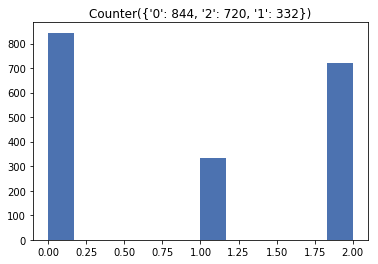

(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.00626319, -0.00807946,  0.        , ...,  0.02745206,
          0.0140783 ,  0.02651351],
        [ 0.01418131,  0.00555346,  0.        , ...,  0.00142535,
         -0.00492627,  0.00086093],
        ..., 
        [ 0.00782218,  0.01138139,  0.00955056, ...,  0.00236185,
          0.0151494 ,  0.02594002],
        [-0.00099388, -0.00722688,  0.01043406, ...,  0.00779409,
         -0.00556227, -0.01412933],
        [ 0.00322141,  0.01726285,  0.00660889, ..., -0.01097119,
          0.00613915,  0.0176724 ]]),
 array([2, 2, 2, ..., 0, 1, 1]),
                    MMM        ABT       ABBV         ACN       ATVI  \
 Date                                                                  
 2010-01-04   68.747681  21.297834   0.000000   35.391899  10.328080   
 2010-01-05   68.317101  21.125759   0.000000   35.610626  10.346360   
 2010-01-06   69.285927  21.243080   0.000000   35.

In [140]:
def extract_featuresets(src, ticker, num_days):
    tickers, df = process_data_for_labels(src, ticker, num_days)
    col_name = '{}_target'.format(ticker)

    df[col_name] = list(
        map(
            classify, 
            *[df['{}_{}d'.format(ticker, i)] for i in range(1, num_days+1)]
        )
    )

    # Just getting an idea of the underlying y distribution
    vals = df[col_name].values.tolist()
    str_vals = [str(i) for i in vals]
    plt.hist(df[col_name].values, bins="auto")
    plt.title('{}'.format(Counter(str_vals)))
    plt.show()
    
    # Error checking
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    # Creating the X values
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    X = df_vals.values
    y = df[col_name].values
    
    return X,y,df


src = 'S&P500_joined_adj-close.csv'
ticker = "AAPL"
num_days = 7
extract_featuresets(src, ticker, num_days)